In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Dans le notebook suivant, nous allons illustrer de façon empirique le [théorème central limite](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite). Ce théorème jour un rôle fondamental en statistique, et nous y ferons appel pour justifier la forme des termes d'erreurs lors de la régression. Il permet de contrôler le comportement d'une somme de variables aléatoires indépendantes et identiquement distribuées lorsque le nombre de tirage est suffisant.

Quelque soit la distribution initiale à partir de laquelle on échantillonne, la moyenne de l'échantillon sera distribuée suivant une loi normale, avec un écart type qui se réduit en $1/\sqrt N $.

Si on définit la variable centrée et réduite:
\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 
Alors, pour N suffisamment grand 
$z \rightarrow N(0,1)$

Nous allons générer une liste de nombre dont nous connaissons parfaitement les propriétés telles que la moyenne ou l'écart-type. 

In [2]:
x = np.random.uniform(100, 200, size=10000)
print("shape x : ", x.shape)
print("10 first elements of x : \n", x[:10])



shape x :  (10000,)
10 first elements of x : 
 [193.90515488 186.81851515 173.43411678 163.95616426 154.42953656
 197.29067    147.91032981 187.67938318 191.49053469 134.36856867]


In [3]:
print("true mean is", x.mean())



true mean is 150.11069787406717


Si on prend 1, puis 2, puis k éléments, alors la moyenne calculée se baladera autour de 49.5, en suivant une loi normale caractérisée par l'écart-type $1/\sqrt k$ 

Nous allons échantillonner plusieurs fois une liste de taille k < 100, et allons voir comment se comportent la moyenne. Compléter la fonction ci-dessous qui prend en entrée un vecteur et qui retourne un vecteur de taille inférieure ou égale.

In [35]:
import random


def sample_index(x, size):
    """sample random elements and return array index with length defined by size
    
        Args:
            :param x: (numpy.array) : vector to sample from
        Returns:
            numpy.array with length defined by siz
            :param size: 
    """
    ret = np.random.randint(0, len(x), size)
    while len(set(ret)) != size:
        ret = np.random.randint(0, len(x), size)
    return ret



In [36]:
a = list(range(10))
print(set([len(set(list(sample_index(a, 4)))) for i in range(5)]))



{4}


Nous allons prendre plusieurs échantillons de taille << 100 et calculer la moyenne.

In [37]:
for i in range(10):
    print(x[sample_index(x, 10)].mean())



133.90805924789174
140.23131172731155
140.24106295772035
153.9859296870449
141.85231585954597
154.66446464632563
132.21544406691712
147.92192858745116
150.89943476290102
146.3509886834211


Construire une liste qui sauvegarde plusieurs valeurs de la moyenne, et construire l'histogramme de ces valeurs. 

In [45]:
N_iterations = 100000
sampled = np.array([x[sample_index(x, 10)].mean() for i in range(N_iterations)])



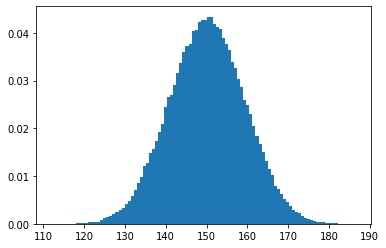

In [46]:
plt.hist(sampled, bins=100, density=True)
plt.show()



Construire la variable réduire $z$

In [53]:
z = (sampled - sampled.mean()) / sampled.std()



Construire la densité gaussienne de moyenne 0 et d'écart-type 1 entre -4 et 4, la représenter graphiquement et superposer l'histogramme de $z$

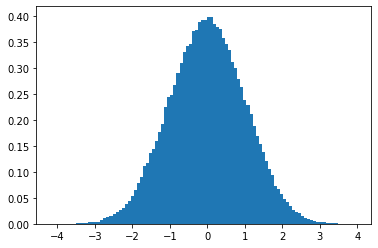

In [54]:
plt.hist(z, bins=100, density=True)
plt.show()

